In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_AAPL = pd.read_csv('AAPL.csv')
df_JPM = pd.read_csv('JPM.csv')
df_SPY = pd.read_csv('SPY.csv')

## Q1

In [3]:
df_SPY.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-08-21,242.639999,243.199997,241.830002,242.899994,221.798569,65469700
1,2017-08-22,243.570007,245.619995,243.550003,245.440002,224.117905,63140100
2,2017-08-23,244.330002,245.050003,244.160004,244.559998,223.314331,50203800
3,2017-08-24,245.000000,245.179993,243.750000,243.990005,222.793884,50741700
4,2017-08-25,244.899994,245.610001,244.389999,244.559998,223.314331,64445900


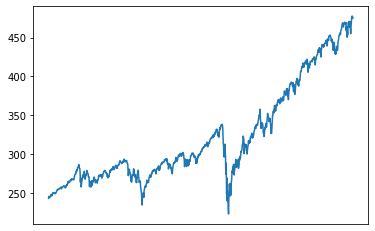

In [4]:
plt.plot(df_SPY['Date'], df_SPY['Close'])
plt.rcParams["figure.figsize"] = (20,10)
plt.tick_params(axis = 'x', which = 'both', bottom =False, top =False, labelbottom = False)

In [5]:
type(df_SPY['Adj Close'])

pandas.core.series.Series

## Q2 

In [6]:
df_SPY['pct_change'] = df_SPY['Adj Close'].pct_change()

In [7]:
df_JPM['pct_change'] = df_JPM['Adj Close'].pct_change()

In [8]:
df_AAPL['pct_change'] = df_AAPL['Adj Close'].pct_change()

In [9]:
df_AAPL.head()

,Date,Open,High,Low,Close,Adj Close,Volume,pct_change
0,2017-08-21,39.375000,39.472500,38.777500,39.302502,37.300640,105474000,NaN
1,2017-08-22,39.557499,40.000000,39.505001,39.945000,37.910423,86418400,0.016348
2,2017-08-23,39.767502,40.117500,39.720001,39.994999,37.957859,77596400,0.001251
3,2017-08-24,40.107498,40.185001,39.637501,39.817501,37.789410,79275600,-0.004438
4,2017-08-25,39.912498,40.139999,39.817501,39.965000,37.929405,101920400,0.003705


In [10]:
df_JPM.head()

,Date,Open,High,Low,Close,Adj Close,Volume,pct_change
0,2017-08-21,90.849998,90.940002,90.160004,90.629997,78.643066,11502100,NaN
1,2017-08-22,91.070000,91.709999,91.000000,91.559998,79.450058,9211800,0.010261
2,2017-08-23,90.870003,92.339996,90.839996,91.669998,79.545494,8811300,0.001201
3,2017-08-24,91.930000,92.120003,91.410004,91.519997,79.415337,8623200,-0.001636
4,2017-08-25,91.879997,92.480003,91.800003,91.889999,79.736397,11794600,0.004043


In [11]:
df_SPY.head()

,Date,Open,High,Low,Close,Adj Close,Volume,pct_change
0,2017-08-21,242.639999,243.199997,241.830002,242.899994,221.798569,65469700,NaN
1,2017-08-22,243.570007,245.619995,243.550003,245.440002,224.117905,63140100,0.010457
2,2017-08-23,244.330002,245.050003,244.160004,244.559998,223.314331,50203800,-0.003585
3,2017-08-24,245.000000,245.179993,243.750000,243.990005,222.793884,50741700,-0.002331
4,2017-08-25,244.899994,245.610001,244.389999,244.559998,223.314331,64445900,0.002336


## Q3

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
SPY_ret = df_SPY['pct_change']
SPY_ret.drop(0, inplace = True)
SPY_ret.head()

1    0.010457
2   -0.003585
3   -0.002331
4    0.002336
5    0.000041
Name: pct_change, dtype: float64

In [15]:
AAPL_ret = df_AAPL['pct_change']
AAPL_ret.drop(0, inplace = True)
AAPL_ret.head()

1    0.016348
2    0.001251
3   -0.004438
4    0.003705
5    0.010071
Name: pct_change, dtype: float64

In [16]:
SPY_ret = SPY_ret.values.reshape(-1,1)

In [17]:
lr = LinearRegression()

In [18]:
lr.fit(SPY_ret, AAPL_ret)

LinearRegression()

In [19]:
print(f'intercept: {lr.intercept_}')
print(f'coefficients: {lr.coef_}')

intercept: 0.0006812430640206729
coefficients: [1.2294445]


In [20]:
JPM_ret = df_JPM['pct_change']
JPM_ret.drop(0, inplace = True)
JPM_ret.head()

1    0.010261
2    0.001201
3   -0.001636
4    0.004043
5   -0.003156
Name: pct_change, dtype: float64

## Q4

In [21]:
historical_JPM = JPM_ret[:100]
future_JPM = JPM_ret[100:]

In [22]:
historical_AAPL = AAPL_ret[:100]
future_AAPL = AAPL_ret[100:]

In [23]:
historical_AAPL.mean()

0.001282489064239466

In [24]:
historical_AAPL.std()

0.01056464440375575

In [25]:
historical_JPM.mean()

0.0023338718245062185

In [26]:
historical_JPM.std()

0.009472395233906982

In [27]:
#historical_JMP, Future_JPM = train_test_split(JPM_ret, test_size= 100, random_state=123, shuffle = False)

In [28]:
#Future_JPM

## Q5

In [29]:
cor = np.corrcoef(historical_AAPL, historical_JPM)
print(cor[0][1])

0.05923528258185965


## Q6

In [30]:
from math import sqrt

In [31]:
future_avg_AAPL = future_AAPL.mean()
future_avg_JPM = future_JPM.mean()
future_std_AAPL = future_JPM.std()
future_std_JPM = future_JPM.std()
w = 0.2 
exp_ret = w*future_AAPL.mean() + (1-w)*future_JPM.mean()
std_ret = sqrt(w**2 * (future_std_AAPL)**2 + (1-w)**2 *future_std_JPM**2 +2*w*(1-w)*cor[0][1]*future_std_AAPL*future_std_JPM)
sharpe = exp_ret/std_ret
#print(exp_ret) 
#print(std_ret)
#print(sharpe)
print('The expected return of the portfolio with w of 0.2 is {}'.format(exp_ret))
print('The Standard Deviation of a portfolio with w of 0.2 is {}'.format(std_ret))
print('The sharpe ratio of a portfolio with w of 0.2 is {}'.format(sharpe))

The expected return of the portfolio with w of 0.2 is 0.0008594086832171292
The Standard Deviation of a portfolio with w of 0.2 is 0.01723241434935356
The sharpe ratio of a portfolio with w of 0.2 is 0.04987163526794887


In [32]:
w = 0.4 
exp_ret = w*future_AAPL.mean() + (1-w)*future_JPM.mean()
std_ret = sqrt(w**2 * (future_std_AAPL)**2 + (1-w)**2 *future_std_JPM**2 +2*w*(1-w)*cor[0][1]*future_std_AAPL*future_std_JPM)
sharpe = exp_ret/std_ret


print('The expected return of the portfolio with w of 0.4 is {}'.format(exp_ret))
print('The Standard Deviation of a portfolio with w of 0.4 is {}'.format(std_ret))
print('The sharpe ratio of a portfolio with w of 0.4 is {}'.format(sharpe))

The expected return of the portfolio with w of 0.4 is 0.0010576175389831383
The Standard Deviation of a portfolio with w of 0.4 is 0.015264521481404544
The sharpe ratio of a portfolio with w of 0.4 is 0.06928599368617896


In [33]:
w = 0.6
exp_ret = w*future_AAPL.mean() + (1-w)*future_JPM.mean()
std_ret = sqrt(w**2 * (future_std_AAPL)**2 + (1-w)**2 *future_std_JPM**2 +2*w*(1-w)*cor[0][1]*future_std_AAPL*future_std_JPM)
sharpe = exp_ret/std_ret


print('The expected return of the portfolio with w of 0.6 is {}'.format(exp_ret))
print('The Standard Deviation of a portfolio with w of 0.6 is {}'.format(std_ret))
print('The sharpe ratio of a portfolio with w of 0.6 is {}'.format(sharpe))

The expected return of the portfolio with w of 0.6 is 0.0012558263947491477
The Standard Deviation of a portfolio with w of 0.6 is 0.015264521481404544
The sharpe ratio of a portfolio with w of 0.6 is 0.08227093107890825


In [34]:
w = 0.8 
exp_ret = w*future_AAPL.mean() + (1-w)*future_JPM.mean()
std_ret = sqrt(w**2 * (future_std_AAPL)**2 + (1-w)**2 *future_std_JPM**2 +2*w*(1-w)*cor[0][1]*future_std_AAPL*future_std_JPM)
sharpe = exp_ret/std_ret


print('The expected return of the portfolio with w of 0.8 is {}'.format(exp_ret))
print('The Standard Deviation of a portfolio with w of 0.8 is {}'.format(std_ret))
print('The sharpe ratio of a portfolio with w of 0.8 is {}'.format(sharpe))

The expected return of the portfolio with w of 0.8 is 0.0014540352505151568
The Standard Deviation of a portfolio with w of 0.8 is 0.017232414349353558
The sharpe ratio of a portfolio with w of 0.8 is 0.08437791832516506
